<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_model_selection/HowManyClusters_Ton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import seaborn as sns
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [44]:
mpg=mpg.drop('cylinders',1)
mpg=mpg.drop('model_year',1)
mpg_nonans = mpg.dropna() # remove observations with NaNs
mpg_num = mpg_nonans.select_dtypes(include='number') # keep only numeric variables 

print('datos originales = {}'.format(mpg.shape))
print('datos originales sin nans = {}'.format(mpg_nonans.shape))
print('datos nonans numericos  = {}'.format(mpg_num.shape))

datos originales = (398, 7)
datos originales sin nans = (392, 7)
datos nonans numericos  = (392, 5)


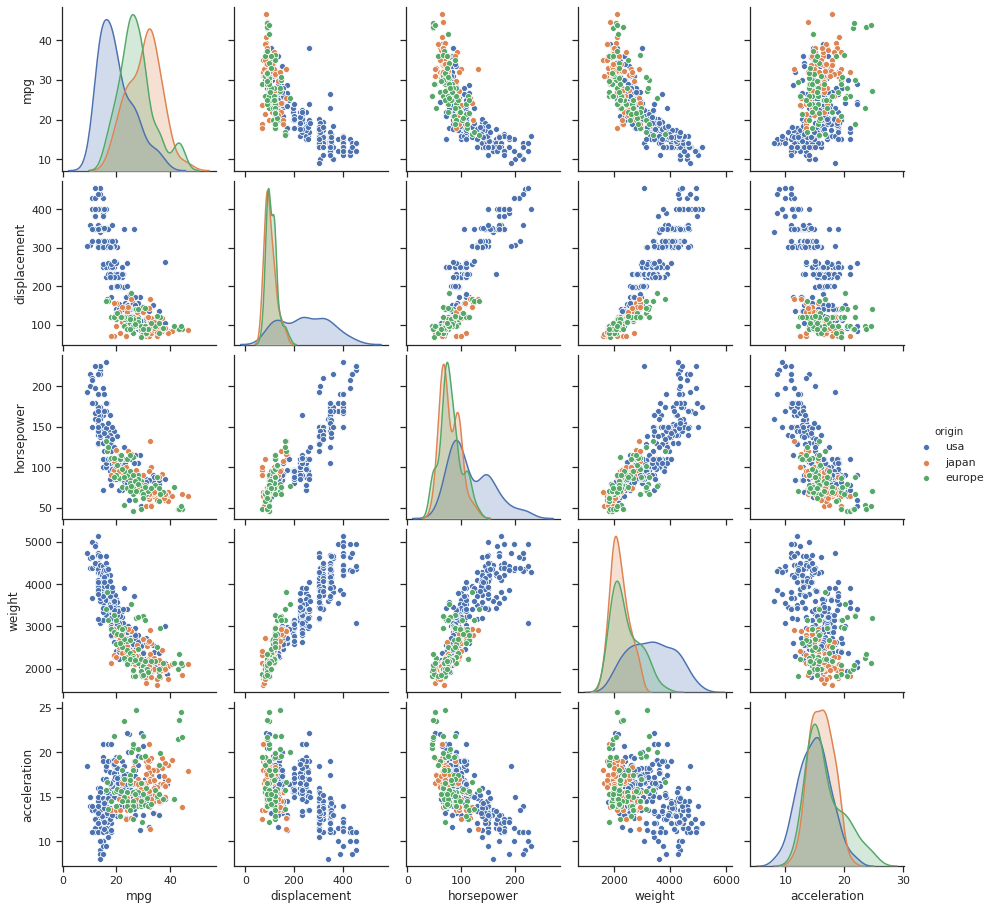

In [52]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(mpg_nonans,hue='origin')

In [45]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(mpg_num)
    bic.append(gmm.bic(mpg_num))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(mpg_num)

[17568.65382619475]
[17568.65382619475, 16977.49860252126]
[17568.65382619475, 16977.49860252126, 16855.488947430425]
[17568.65382619475, 16977.49860252126, 16855.488947430425, 16918.826749773423]
[17568.65382619475, 16977.49860252126, 16855.488947430425, 16918.826749773423, 16852.37637463135]
[17568.65382619475, 16977.49860252126, 16855.488947430425, 16918.826749773423, 16852.37637463135, 16925.180752649696]
[17568.65382619475, 16977.49860252126, 16855.488947430425, 16918.826749773423, 16852.37637463135, 16925.180752649696, 16959.668366326296]
[17568.65382619475, 16977.49860252126, 16855.488947430425, 16918.826749773423, 16852.37637463135, 16925.180752649696, 16959.668366326296, 17046.132007297]
[17568.65382619475, 16977.49860252126, 16855.488947430425, 16918.826749773423, 16852.37637463135, 16925.180752649696, 16959.668366326296, 17046.132007297, 17147.46062653861]
[17568.65382619475, 16977.49860252126, 16855.488947430425, 16918.826749773423, 16852.37637463135, 16925.180752649696, 16

In [0]:
clust_gmm = mixture.GaussianMixture(n_components=5,covariance_type='full').fit_predict(mpg_num)

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import mixture

X = mpg_num
X['labels']=gmm.predict(mpg_num)
g2 = sns.pairplot(X, hue='labels')

ValueError: ignored

In [73]:
X1 = mpg_num
X1['labels']=gmm.predict(mpg_num)
g2 = sns.pairplot(X1, hue='labels')

ValueError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


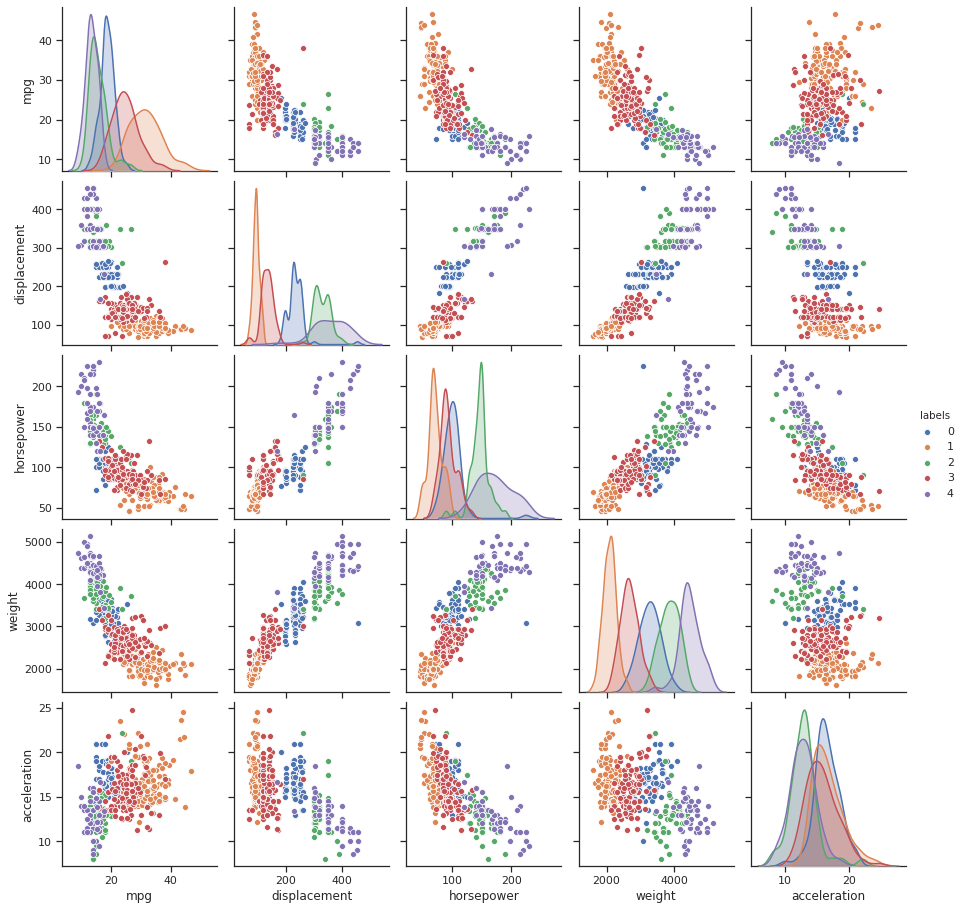

In [62]:
X2 = mpg_num
X2['labels']=gmm.predict(mpg_num)
g3 = sns.pairplot(X2, hue='labels')

Por qué representa este último y los anteriores no?